Import Necessary Libraries 

In [1]:
import pandas as pd # To handle and manipulate structured data
import numpy as np  # To perform numerical operations efficiently, especially for arrays and matrices.
import seaborn as sns # To create advanced and aesthetically pleasing data visualizations based on Matplotlib.
import matplotlib.pylab as plt # To provide functionality for creating basic plots and customizing visualizations.
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Styling
pd.set_option('display.max_columns',200) # To show up to 200 columns when displaying DataFrames.

# Handling Imbalance data
from imblearn.over_sampling import ADASYN

# Standarlization 
from sklearn.preprocessing import StandardScaler

# For pipeline to avoid data leakage 
from imblearn.pipeline import Pipeline as ImbPipeline


from sklearn.model_selection import (
    train_test_split, # To split the dataset into training and testing sets
    cross_val_score, # It estimates the model's performance compared to a single train-test split.
    StratifiedKFold, # It preserves the proportion of classes in the target variable across all folds.
    GridSearchCV # To find the best combination of hyperparameters
)

# Training Model 
from sklearn.svm import SVC

# Evaluator for testing 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

import pickle

Importing functions that will generate synthetic data 

Student contains name, year, student number.  
GrdSystem contains the individual grades per subject, the calculator for computing grades (Based on student handbook), and the indicator of the student status (Regular or Irregular).    
S_H_Survey will give the answers: 

Homework/Assignments - Do you feel that completing your homework helps you understand the course material better? Yes/No

Time Allocation - Self-reported ratings on ability to manage study time (e.g., poor, fair, good).

Reading and Note-taking - Types of note-taking methods used (e.g., handwritten, digital).

Study Period Procedures - Use of Study Techniques: Frequency of using different study techniques (e.g., summarizing, group discussions, flashcards, pomodoro).

Examination Taking - Average time spent preparing for exams.

Teachers Consultation  - Do you regularly consult with your teachers outside of class? Yes/No 

In [2]:
from stdInfo_Function import Student

student = Student(624)
student_info = student.std_info_dt()
print(student_info)

                    Name  Year Student Number
0         Michael Thomas     1       24427517
1        Michael Mcguire     4       21908695
2         Jonathan Smith     4       21620116
3           Jaime Phelps     2       23128726
4        Nicole Hamilton     3       22926109
..                   ...   ...            ...
619  Hailey Crawford PhD     2       23052132
620        Ryan Randolph     3       22373269
621       Caitlin Torres     2       23560694
622     Yolanda Stephens     1       24256396
623       Kenneth Flores     2       23494422

[624 rows x 3 columns]


In [3]:
from stdGrade_Function import GrdSystem

students = GrdSystem(624)
student_grades = students.overall_dt_stdGrades()
print(student_grades)

                    Name  Year Student Number  Subject_1  Subject_2  \
0         Michael Thomas     1       24427517       1.25       3.00   
1        Michael Mcguire     4       21908695       1.75       2.00   
2         Jonathan Smith     4       21620116       1.00       1.75   
3           Jaime Phelps     2       23128726       1.25       2.50   
4        Nicole Hamilton     3       22926109       1.25       3.00   
..                   ...   ...            ...        ...        ...   
619  Hailey Crawford PhD     2       23052132       2.00       2.25   
620        Ryan Randolph     3       22373269       2.50       4.00   
621       Caitlin Torres     2       23560694       4.00       2.00   
622     Yolanda Stephens     1       24256396       2.50       2.75   
623       Kenneth Flores     2       23494422       1.00       1.00   

     Subject_3  Subject_4  Subject_5     Status  Subject_6  Subject_7  \
0         2.25       1.50       1.00    Regular        NaN        NaN   
1

In [4]:
from StudyHbtsSurvey_Function import S_H_Survey

survey = S_H_Survey(624, total_respondents= 624, respondents_ans=531)
student_survey = survey.std_info_and_survey()
print(student_survey)

                    Name  Year Student Number Homework Time Allocation  \
0         Michael Thomas     1       24427517      Yes            Good   
1        Michael Mcguire     4       21908695       No            Fair   
2         Jonathan Smith     4       21620116      Yes            Fair   
3           Jaime Phelps     2       23128726       No            Fair   
4        Nicole Hamilton     3       22926109       No            Good   
..                   ...   ...            ...      ...             ...   
619  Hailey Crawford PhD     2       23052132     None            None   
620        Ryan Randolph     3       22373269     None            None   
621       Caitlin Torres     2       23560694     None            None   
622     Yolanda Stephens     1       24256396     None            None   
623       Kenneth Flores     2       23494422     None            None   

    Reading and Note Taking Study Period Procedures  Examination  \
0                   Digital       Group Dis

Concatenating Dataframes 

In [5]:
concat_data = pd.merge(student_grades, student_survey, how= "left", on= ["Student Number", "Name", "Year"])
concat_data

,Name,Year,Student Number,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Status,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Homework,Time Allocation,Reading and Note Taking,Study Period Procedures,Examination,Teachers Consultation
0,Michael Thomas,1,24427517,1.25,3.00,2.25,1.50,1.00,Regular,NaN,NaN,NaN,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes
1,Michael Mcguire,4,21908695,1.75,2.00,2.75,3.00,1.50,Regular,NaN,NaN,NaN,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No
2,Jonathan Smith,4,21620116,1.00,1.75,2.50,1.75,2.00,Regular,NaN,NaN,NaN,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes
3,Jaime Phelps,2,23128726,1.25,2.50,4.00,5.00,1.00,Irregular,2.75,2.25,1.00,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes
4,Nicole Hamilton,3,22926109,1.25,3.00,4.00,1.25,2.00,Irregular,4.00,2.25,NaN,2.54,2,No,Good,Digital,Summarizing,13.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Hailey Crawford PhD,2,23052132,2.00,2.25,1.50,3.00,2.25,Regular,1.50,2.25,1.00,1.97,0,None,None,None,None,NaN,None
620,Ryan Randolph,3,22373269,2.50,4.00,1.50,1.50,3.00,Irregular,1.00,2.75,NaN,2.32,1,None,None,None,None,NaN,None
621,Caitlin Torres,2,23560694,4.00,2.00,5.00,2.25,1.75,Irregular,4.00,1.50,5.00,3.15,4,None,None,None,None,NaN,None
622,Yolanda Stephens,1,24256396,2.50,2.75,1.25,5.00,5.00,Irregular,NaN,NaN,NaN,3.36,2,None,None,None,None,NaN,None


Understanding dataframes 

In [6]:
concat_data.shape

(624, 20)

In [7]:
concat_data.dtypes

Name                        object
Year                         int64
Student Number              object
Subject_1                  float64
Subject_2                  float64
Subject_3                  float64
Subject_4                  float64
Subject_5                  float64
Status                      object
Subject_6                  float64
Subject_7                  float64
Subject_8                  float64
Final Grade                float64
Subjects Failed              int64
Homework                    object
Time Allocation             object
Reading and Note Taking     object
Study Period Procedures     object
Examination                float64
Teachers Consultation       object
dtype: object

In [8]:
concat_data.describe()

,Year,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Final Grade,Subjects Failed,Examination
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,308.000000,308.000000,144.000000,624.000000,624.000000,531.000000
mean,2.597756,2.497596,2.430288,2.480369,2.532452,2.479567,2.504058,2.383929,2.421875,2.478317,1.141026,10.932203
std,1.120391,1.166597,1.123471,1.163981,1.169798,1.122727,1.166592,1.122995,1.237338,0.460393,0.954494,5.704940
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.350000,0.000000,1.000000
25%,2.000000,1.500000,1.500000,1.500000,1.750000,1.500000,1.500000,1.500000,1.500000,2.120000,0.000000,6.000000
50%,3.000000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.450000,1.000000,11.000000
75%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.750000,3.000000,2.800000,2.000000,16.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.020000,5.000000,20.000000


Cleaning the Data

In [9]:
#Checking Duplicates 

concat_data.duplicated().sum()

np.int64(0)

In [10]:
#Checking null values 

concat_data.isnull().sum()

Name                         0
Year                         0
Student Number               0
Subject_1                    0
Subject_2                    0
Subject_3                    0
Subject_4                    0
Subject_5                    0
Status                       0
Subject_6                  316
Subject_7                  316
Subject_8                  480
Final Grade                  0
Subjects Failed              0
Homework                    93
Time Allocation             93
Reading and Note Taking     93
Study Period Procedures     93
Examination                 93
Teachers Consultation       93
dtype: int64

In [11]:
#Dropping unnecessary columns 

concat_data.columns 

Index(['Name', 'Year', 'Student Number', 'Subject_1', 'Subject_2', 'Subject_3',
       'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
       'Subject_8', 'Final Grade', 'Subjects Failed', 'Homework',
       'Time Allocation', 'Reading and Note Taking', 'Study Period Procedures',
       'Examination', 'Teachers Consultation'],
      dtype='object')

In [12]:
concat_data = concat_data[[
    #    'Name', 
        'Year', 
    #    'Student Number', 
    #    'Subject_1', 'Subject_2', 'Subject_3',
    #    'Subject_4', 'Subject_5', 'Status', 'Subject_6', 'Subject_7',
    #    'Subject_8', 
       'Final Grade', 'Subjects Failed', 'Homework',
       'Time Allocation', 'Reading and Note Taking', 'Study Period Procedures',
       'Examination', 'Teachers Consultation', 'Status']].copy()

concat_data.head()

,Year,Final Grade,Subjects Failed,Homework,Time Allocation,Reading and Note Taking,Study Period Procedures,Examination,Teachers Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular


In [13]:
# Renaming Columns 

concat_data = concat_data.rename(columns = { 
    "Final Grade" : "Final_Grade",
    "Subjects Failed" : "Subjects_Failed",
    "Time Allocation" : "Time_Allocation",
    "Reading and Note Taking" : "Reading_and_Note_Taking",
    "Study Period Procedures" : "Study_Period_Procedures",
    "Teachers Consultation": "Teachers_Consultation",
})

concat_data.head()

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular


In [14]:
#Converting dtypes float to int 

concat_data['Final_Grade'] = pd.to_numeric(concat_data['Final_Grade'], errors='coerce')

concat_data.dtypes

Year                         int64
Final_Grade                float64
Subjects_Failed              int64
Homework                    object
Time_Allocation             object
Reading_and_Note_Taking     object
Study_Period_Procedures     object
Examination                float64
Teachers_Consultation       object
Status                      object
dtype: object

Handling Missing Values 

In [15]:
concat_data.isnull().sum()

Year                        0
Final_Grade                 0
Subjects_Failed             0
Homework                   93
Time_Allocation            93
Reading_and_Note_Taking    93
Study_Period_Procedures    93
Examination                93
Teachers_Consultation      93
Status                      0
dtype: int64

<Axes: >

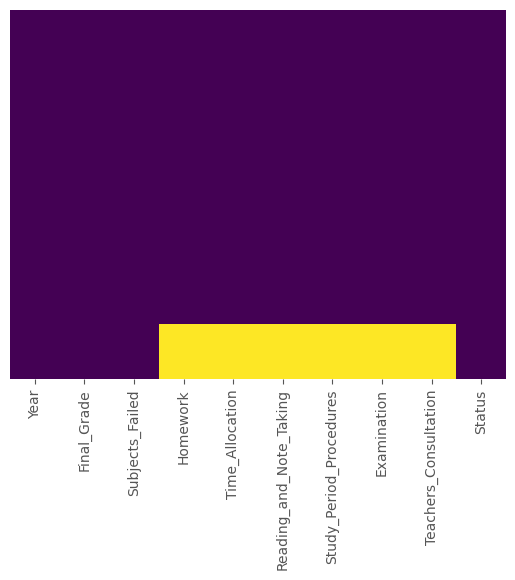

In [16]:
sns.heatmap(concat_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Status', ylabel='count'>

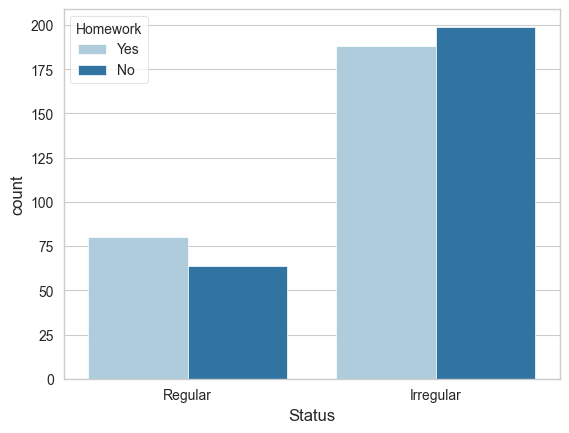

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Homework', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

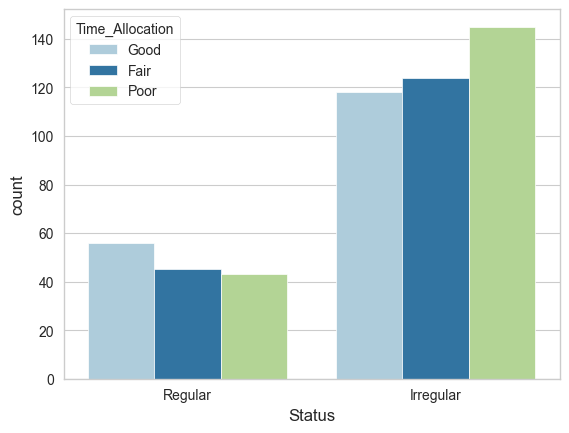

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Time_Allocation', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

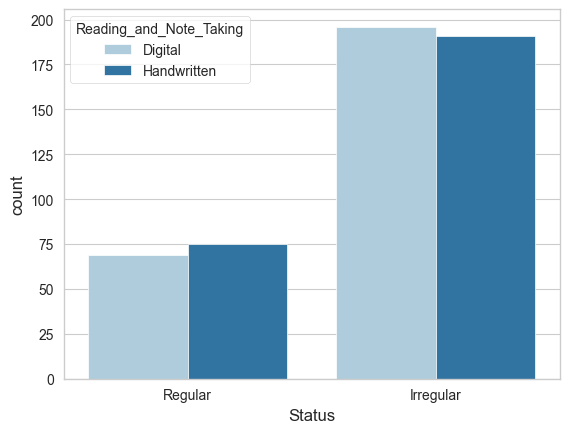

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Reading_and_Note_Taking', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

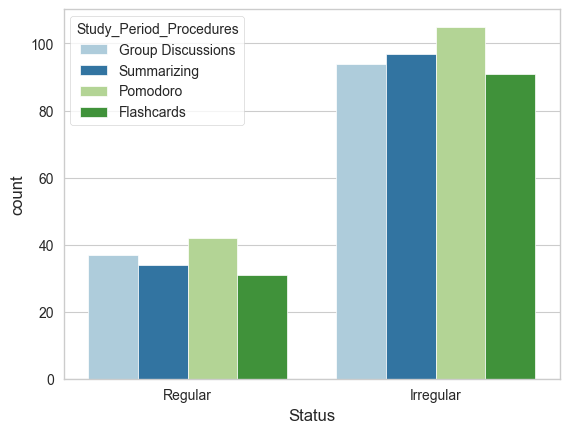

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Study_Period_Procedures', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

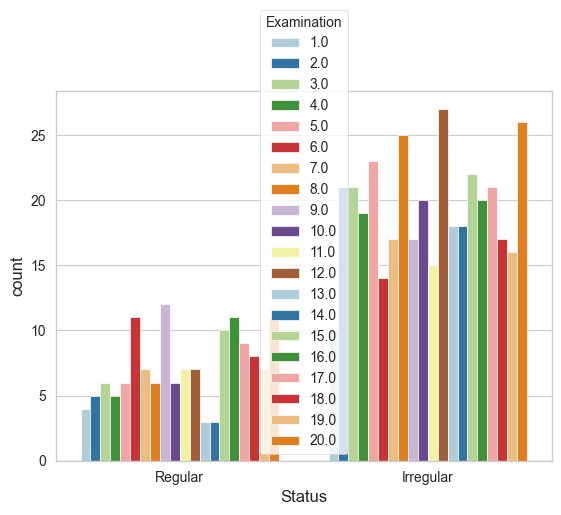

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Examination', data=concat_data, palette='Paired')

<Axes: xlabel='Status', ylabel='count'>

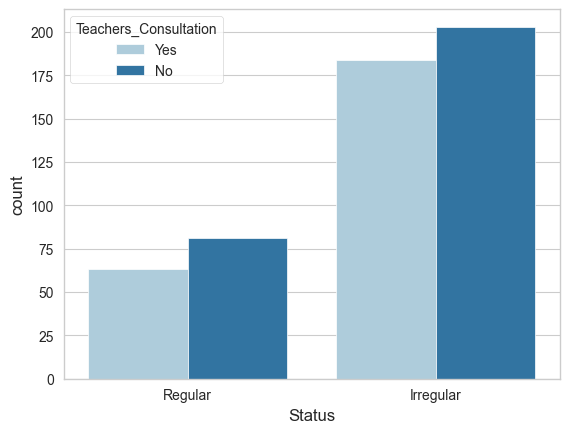

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Status', hue='Teachers_Consultation', data=concat_data, palette='Paired')

In [23]:
import random

homework_counts = concat_data['Homework'].dropna().value_counts(normalize=True)

# Fill missing values in 'Homework' based on the distribution of existing values
concat_data['Homework'] = concat_data['Homework'].apply(
    lambda x: random.choices(homework_counts.index, 
                             weights=homework_counts, 
                             k=1)[0] if pd.isnull(x) else x
)

In [24]:
Time_Allocation_counts = concat_data['Time_Allocation'].dropna().value_counts(normalize=True)

# Fill missing values in 'Time_Allocation' based on the distribution of existing values
concat_data['Time_Allocation'] = concat_data['Time_Allocation'].apply(
    lambda x: random.choices(Time_Allocation_counts.index, 
                             weights=Time_Allocation_counts, 
                             k=1)[0] if pd.isnull(x) else x
)

In [25]:
Reading_and_Note_Taking_counts = concat_data['Reading_and_Note_Taking'].dropna().value_counts(normalize=True)

# Fill missing values in 'Reading_and_Note_Taking' based on the distribution of existing values
concat_data['Reading_and_Note_Taking'] = concat_data['Reading_and_Note_Taking'].apply(
    lambda x: random.choices(Reading_and_Note_Taking_counts.index, 
                             weights=Reading_and_Note_Taking_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [26]:
Study_Period_Procedures_counts = concat_data['Study_Period_Procedures'].dropna().value_counts(normalize=True)

# Fill missing values in 'Study_Period_Procedures' based on the distribution of existing values
concat_data['Study_Period_Procedures'] = concat_data['Study_Period_Procedures'].apply(
    lambda x: random.choices(Study_Period_Procedures_counts.index, 
                             weights=Study_Period_Procedures_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [27]:
Examination_counts = concat_data['Examination'].dropna().value_counts(normalize=True)

# Fill missing values in 'Examination' based on the distribution of existing values
concat_data['Examination'] = concat_data['Examination'].apply(
    lambda x: random.choices(Examination_counts.index, 
                             weights=Examination_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [28]:
Teachers_Consultation_counts = concat_data['Teachers_Consultation'].dropna().value_counts(normalize=True)

# Fill missing values in 'Teachers_Consultation' based on the distribution of existing values
concat_data['Teachers_Consultation'] = concat_data['Teachers_Consultation'].apply(
    lambda x: random.choices(Teachers_Consultation_counts.index, 
                             weights=Teachers_Consultation_counts, 
                             k=1)[0] if pd.isnull(x) else x
)


In [29]:
concat_data

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,Yes,Good,Digital,Group Discussions,2.0,Yes,Regular
1,4,2.20,0,No,Fair,Handwritten,Summarizing,7.0,No,Regular
2,4,1.80,0,Yes,Fair,Handwritten,Pomodoro,19.0,Yes,Regular
3,2,2.52,2,No,Fair,Handwritten,Summarizing,17.0,Yes,Irregular
4,3,2.54,2,No,Good,Digital,Summarizing,13.0,Yes,Irregular
...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,No,Fair,Digital,Pomodoro,6.0,Yes,Regular
620,3,2.32,1,No,Good,Handwritten,Summarizing,7.0,Yes,Irregular
621,2,3.15,4,No,Poor,Handwritten,Summarizing,12.0,No,Irregular
622,1,3.36,2,Yes,Fair,Handwritten,Flashcards,17.0,No,Irregular


In [30]:
concat_data.isnull().sum()

Year                       0
Final_Grade                0
Subjects_Failed            0
Homework                   0
Time_Allocation            0
Reading_and_Note_Taking    0
Study_Period_Procedures    0
Examination                0
Teachers_Consultation      0
Status                     0
dtype: int64

Some data are in object, we need to convert it to numerical for better understading 

In [ ]:
# Converting using pd.dummies

features_dummies = pd.get_dummies(concat_data[['Time_Allocation','Study_Period_Procedures']])

features_dummies = features_dummies.astype(int)

features_dummies


,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing
0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
619,1,0,0,0,0,1,0
620,0,1,0,0,0,0,1
621,0,0,1,0,0,0,1
622,1,0,0,1,0,0,0


In [32]:
# Converting using labelencoder 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

concat_data['Homework'] = label_encoder.fit_transform(concat_data['Homework'])
concat_data['Reading_and_Note_Taking'] = label_encoder.fit_transform(concat_data['Reading_and_Note_Taking'])
concat_data['Teachers_Consultation'] = label_encoder.fit_transform(concat_data['Teachers_Consultation'])
concat_data['Status'] = label_encoder.fit_transform(concat_data['Status'])

concat_data

,Year,Final_Grade,Subjects_Failed,Homework,Time_Allocation,Reading_and_Note_Taking,Study_Period_Procedures,Examination,Teachers_Consultation,Status
0,1,1.84,0,1,Good,0,Group Discussions,2.0,1,1
1,4,2.20,0,0,Fair,1,Summarizing,7.0,0,1
2,4,1.80,0,1,Fair,1,Pomodoro,19.0,1,1
3,2,2.52,2,0,Fair,1,Summarizing,17.0,1,0
4,3,2.54,2,0,Good,0,Summarizing,13.0,1,0
...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,0,Fair,0,Pomodoro,6.0,1,1
620,3,2.32,1,0,Good,1,Summarizing,7.0,1,0
621,2,3.15,4,0,Poor,1,Summarizing,12.0,0,0
622,1,3.36,2,1,Fair,1,Flashcards,17.0,0,0


In [33]:
# Concatenate the dummies with the original data
concat_data_updated = pd.concat([concat_data, features_dummies], axis=1)

# Drop the original columns 
concat_data_updated = concat_data_updated.drop(['Time_Allocation', 'Study_Period_Procedures'], axis=1)

concat_data_updated.head()

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Status,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing
0,1,1.84,0,1,0,2.0,1,1,0,1,0,0,1,0,0
1,4,2.20,0,0,1,7.0,0,1,1,0,0,0,0,0,1
2,4,1.80,0,1,1,19.0,1,1,1,0,0,0,0,1,0
3,2,2.52,2,0,1,17.0,1,0,1,0,0,0,0,0,1
4,3,2.54,2,0,0,13.0,1,0,0,1,0,0,0,0,1


In [34]:
concat_data_updated.columns

Index(['Year', 'Final_Grade', 'Subjects_Failed', 'Homework',
       'Reading_and_Note_Taking', 'Examination', 'Teachers_Consultation',
       'Status', 'Time_Allocation_Fair', 'Time_Allocation_Good',
       'Time_Allocation_Poor', 'Study_Period_Procedures_Flashcards',
       'Study_Period_Procedures_Group Discussions',
       'Study_Period_Procedures_Pomodoro',
       'Study_Period_Procedures_Summarizing'],
      dtype='object')

In [ ]:
concat_data_updated = concat_data_updated[['Year', 'Final_Grade', 'Subjects_Failed', 'Homework',
       'Reading_and_Note_Taking', 'Examination', 'Teachers_Consultation',
        'Time_Allocation_Fair', 'Time_Allocation_Good',
       'Time_Allocation_Poor', 'Study_Period_Procedures_Flashcards',
       'Study_Period_Procedures_Group Discussions',
       'Study_Period_Procedures_Pomodoro',
       'Study_Period_Procedures_Summarizing','Status']]

concat_data_updated

,Year,Final_Grade,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Status
0,1,1.84,0,1,0,2.0,1,0,1,0,0,1,0,0,1
1,4,2.20,0,0,1,7.0,0,1,0,0,0,0,0,1,1
2,4,1.80,0,1,1,19.0,1,1,0,0,0,0,1,0,1
3,2,2.52,2,0,1,17.0,1,1,0,0,0,0,0,1,0
4,3,2.54,2,0,0,13.0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2,1.97,0,0,0,6.0,1,1,0,0,0,0,1,0,1
620,3,2.32,1,0,1,7.0,1,0,1,0,0,0,0,1,0
621,2,3.15,4,0,1,12.0,0,0,0,1,0,0,0,1,0
622,1,3.36,2,1,1,17.0,0,1,0,0,1,0,0,0,0


In [36]:
concat_data_updated.dtypes

Year                                           int64
Final_Grade                                  float64
Subjects_Failed                                int64
Homework                                       int64
Reading_and_Note_Taking                        int64
Examination                                  float64
Teachers_Consultation                          int64
Time_Allocation_Fair                           int64
Time_Allocation_Good                           int64
Time_Allocation_Poor                           int64
Study_Period_Procedures_Flashcards             int64
Study_Period_Procedures_Group Discussions      int64
Study_Period_Procedures_Pomodoro               int64
Study_Period_Procedures_Summarizing            int64
Status                                         int64
dtype: object

Independent variables are the predictor or the features that will help us predict whether the student has probability to be a irregular student for the next semester or will probably stay as regular student based on their study habits that is gathered through the survey and final grades

Dependent variable is the target variable or what we are trying to know which is the status of the student

In [37]:
# Dependent(y) and Independent(x) Variable segregation 

x = concat_data_updated.drop(['Final_Grade'], axis=1)
y = concat_data_updated['Final_Grade']

In [38]:
#Data Spliting (Training and Testing Set)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [39]:
y_train_df = y_train.rename("Target")

# Concatenate the feature DataFrame (x_train) with the target column (y_train_df)
columnStatus_for_correlation = pd.concat([x_train, y_train_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = columnStatus_for_correlation.corr()

In [ ]:
correlation_matrix

,Year,Subjects_Failed,Homework,Reading_and_Note_Taking,Examination,Teachers_Consultation,Time_Allocation_Fair,Time_Allocation_Good,Time_Allocation_Poor,Study_Period_Procedures_Flashcards,Study_Period_Procedures_Group Discussions,Study_Period_Procedures_Pomodoro,Study_Period_Procedures_Summarizing,Status,Target
Year,1.000000,-0.047785,0.059349,0.022876,0.004874,0.080117,0.007914,0.001925,-0.009619,-0.024079,0.056472,-0.019663,-0.012438,0.038800,-0.010652
Subjects_Failed,-0.047785,1.000000,-0.041254,-0.077212,0.005680,-0.026125,-0.062747,-0.069007,0.129581,0.023732,-0.043320,-0.040260,0.063234,-0.719630,0.774446
Homework,0.059349,-0.041254,1.000000,-0.051099,0.058194,-0.031621,0.087670,-0.040507,-0.045218,0.088103,-0.053202,-0.076689,0.048684,0.071612,-0.002622
Reading_and_Note_Taking,0.022876,-0.077212,-0.051099,1.000000,0.102832,0.021983,-0.075085,0.137226,-0.062991,0.006013,0.003306,0.002465,-0.011871,0.040766,-0.078360
Examination,0.004874,0.005680,0.058194,0.102832,1.000000,-0.052093,-0.065465,-0.001373,0.065133,0.010946,-0.021408,0.051522,-0.043943,0.034563,-0.013183
Teachers_Consultation,0.080117,-0.026125,-0.031621,0.021983,-0.052093,1.000000,0.055287,-0.001137,-0.052728,0.026894,-0.013985,-0.073428,0.065783,0.010813,-0.035013
Time_Allocation_Fair,0.007914,-0.062747,0.087670,-0.075085,-0.065465,0.055287,1.000000,-0.482764,-0.495208,0.081286,-0.007136,-0.039150,-0.031057,0.051107,-0.014275
Time_Allocation_Good,0.001925,-0.069007,-0.040507,0.137226,-0.001373,-0.001137,-0.482764,1.000000,-0.521762,-0.039126,0.055518,-0.015858,-0.000731,0.020458,-0.086479
Time_Allocation_Poor,-0.009619,0.129581,-0.045218,-0.062991,0.065133,-0.052728,-0.495208,-0.521762,1.000000,-0.040369,-0.048124,0.053869,0.030979,-0.070080,0.099696
Study_Period_Procedures_Flashcards,-0.024079,0.023732,0.088103,0.006013,0.010946,0.026894,0.081286,-0.039126,-0.040369,1.000000,-0.309098,-0.345547,-0.303354,0.012036,0.029024


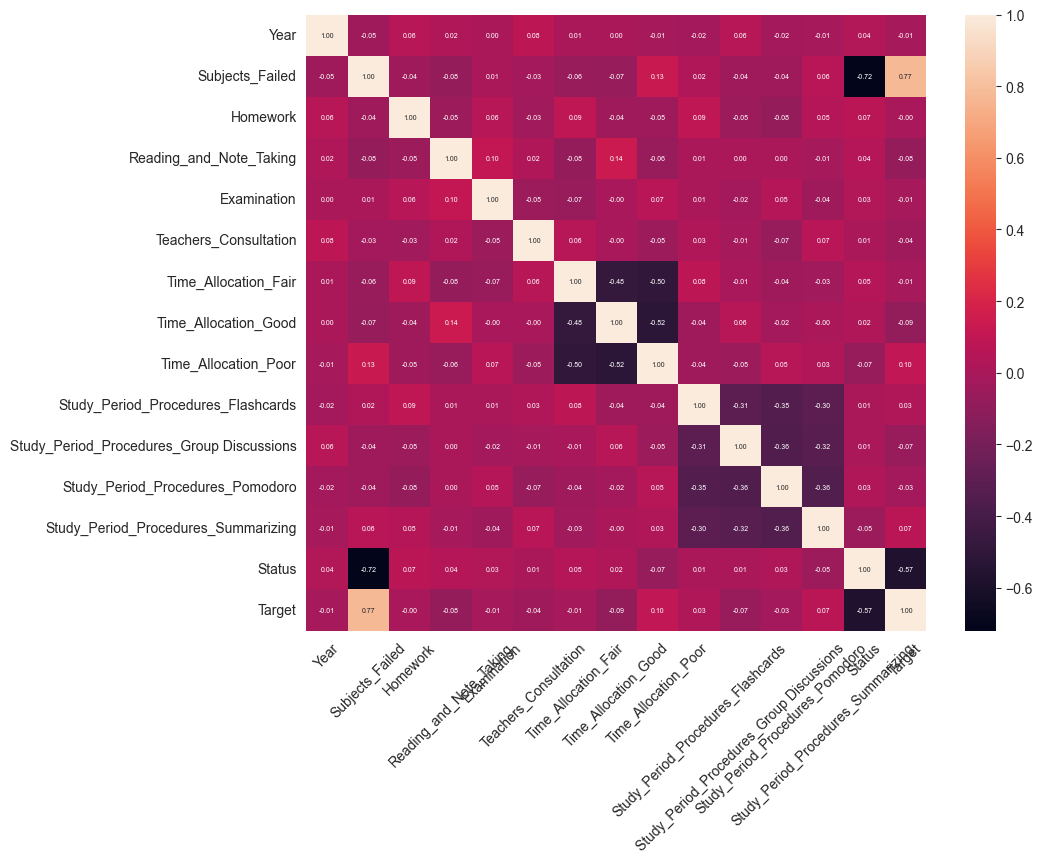

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 5})
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Rotate y-axis labels
plt.show()

TRAINING SVM MODEL

Identifying right hyperparameter 

Creating pipeline to avoid data leakage wherein: 

Standardization, Smote, Model (SVM) are being performed 

In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline

# Define SVR Model
svr_model = SVR(C=0.1, gamma=0.2, kernel='rbf')

# Create Pipeline (No SMOTE for regression tasks)
pipeline_svr = make_pipeline(StandardScaler(), svr_model)

# Use KFold instead of StratifiedKFold for regression
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# Perform Cross-Validation with a regression metric
cv_scores = cross_val_score(pipeline_svr, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Display Results
print('Cross-validation scores (MSE):', -cv_scores)  # MSE values are negative by default
print('Mean cross-validation score (MSE):', -np.mean(cv_scores))
print('Standard deviation of cross-validation score:', np.std(cv_scores))

Cross-validation scores (MSE): [0.18406032 0.15907635 0.10973005 0.15046705 0.20120139]
Mean cross-validation score (MSE): 0.16090703155416783
Standard deviation of cross-validation score: 0.03127663059171305


In [43]:
from sklearn.inspection import permutation_importance

pipeline_svr.fit(x_train, y_train)

perm_importance = permutation_importance(pipeline_svr, x_test, y_test, n_repeats=10, random_state=25)

importance_scores = perm_importance.importances_mean

# Sort the features by importance
sorted_idx = np.argsort(importance_scores)[::-1]

for idx in sorted_idx:
    print(f"Feature: {x_train.columns[idx]}, Importance: {importance_scores[idx]}")


Feature: Subjects_Failed, Importance: 0.21406747046509858
Feature: Status, Importance: 0.12694146111156848
Feature: Study_Period_Procedures_Summarizing, Importance: 0.023011384115366417
Feature: Study_Period_Procedures_Pomodoro, Importance: 0.021842655244473087
Feature: Time_Allocation_Fair, Importance: 0.018605773513157
Feature: Study_Period_Procedures_Flashcards, Importance: 0.016109415291868802
Feature: Study_Period_Procedures_Group Discussions, Importance: 0.012074268819272992
Feature: Time_Allocation_Poor, Importance: 0.01083395015449955
Feature: Time_Allocation_Good, Importance: 0.009889102816865235
Feature: Reading_and_Note_Taking, Importance: 0.0037948750278811393
Feature: Year, Importance: 0.0007364669011531877
Feature: Examination, Importance: -0.005056273666330735
Feature: Teachers_Consultation, Importance: -0.005290360964275265
Feature: Homework, Importance: -0.006081974612624941


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the pipeline to training data
pipeline_svr.fit(x_train, y_train)

# Predict on the test set
y_pred_svr = pipeline_svr.predict(x_test)

# Evaluate performance
test_mae = mean_absolute_error(y_test, y_pred_svr)
test_mse = mean_squared_error(y_test, y_pred_svr)
test_r2 = r2_score(y_test, y_pred_svr)

# Print regression metrics
print('Test Mean Absolute Error (MAE):', test_mae)
print('Test Mean Squared Error (MSE):', test_mse)
print('Test R-squared (R²):', test_r2)


Test Mean Absolute Error (MAE): 0.30795343876975734
Test Mean Squared Error (MSE): 0.13818387627069803
Test R-squared (R²): 0.31362805610205635


In [45]:
import nbformat
from nbconvert import PythonExporter

# Load the notebook file
with open('SVM_Solo_woGans_convert(1).ipynb') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert to Python script
exporter = PythonExporter()
python_script, _ = exporter.from_notebook_node(notebook_content)

# Save the Python script to a .py file
with open('SVM_Solo_woGans_convert.py', 'w') as f:
    f.write(python_script)


In [46]:
with open('SVM_Solo_woGans_convert.pkl', 'wb') as f:
    pickle.dump(pipeline_svr, f)